In [1]:
import cv2
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import dlib
import imutils
from imutils import face_utils
import numpy as np
import inception_resnet_v1
import tensorflow as tf
import math
from imutils.video import FPS
from imutils.video import FileVideoStream
import time

Instructions for updating:
Use the retry module or similar alternatives.


In [ ]:
# cap = FileVideoStream(0).start()
# time.sleep(1.0)


cap = cv2.VideoCapture(0)
num_frame = 0
while True:
    ret, img = cap.read()
#     img = cap.read()

#     num_frame += 1
#     if (num_frame % 10 == 0):
    # Xet frame do, khuon mat la chinh giua hay chua
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)


        shape = face_utils.shape_to_np(shape)


        center_face = shape[36][1] - shape[45][1]
        print("center face", center_face)
        left = shape[36][0] - shape[33][0]
        right = shape[33][0] - shape[45][0]
        bias = math.fabs(left) - math.fabs(right)

        top = shape[19][1] - shape[33][1]
        bottom = shape[33][1] - shape[8][1]
        bias_vertical = (top - bottom)
        print("bias_vertical: ", bias_vertical)
        if center_face < 120 and center_face > -120 and math.fabs(bias) < 132:

            (x, y, w, h) = face_utils.rect_to_bb(rect)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

            cv2.putText(img, "Face #{}".format(i+1), (x-10, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#                 for (x, y) in shape:
# #                 x, y = shape[33]
#                     cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
            x, y = shape[0]
            cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
            x, y = shape[16]
            cv2.circle(img, (x, y), 1, (0, 0, 255), -1)

#                 x, y = shape[33]
#                 cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
#                 x, y = shape[8]
#                 cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
#                 x, y = shape[9]
#                 cv2.circle(img, (x, y), 1, (0, 0, 255), -1)

#                 x, y = shape[10]
#                 cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
#                 x, y = shape[22]
#                 cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
#                 x, y = shape[19]
#                 cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
        cv2.imshow("result", img)
        key = cv2.waitKey(1)

        if key == 27:
            break

center face 1
bias_vertical:  -21
center face 1
bias_vertical:  -23
center face 0
bias_vertical:  -23
center face 0
bias_vertical:  -23
center face 0
bias_vertical:  -23
center face 1
bias_vertical:  -19
center face -4
bias_vertical:  -25
center face 5
bias_vertical:  -17
center face 2
bias_vertical:  -22
center face -5
bias_vertical:  -25
center face -4
bias_vertical:  -25
center face -2
bias_vertical:  -23


In [ ]:
# recognition face center
def face_center(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # detect rectangles from image faces
    rects = detector(image_gray, 1)
    for (i, rect) in enumerate(rects):
        points = predictor(image_gray, rect)
        points = face_utils.shape_to_np(points)
        
        # center face
        center_face = math.fabs(points[36][1] - points[45][1])
        
        # bias left right distance face
        left = points[36][0] - points[33][0]
        right = points[33][0] - points[45][0]
        bias_horizonal = math.fabs(left - right)
        
        if center_face < 25 and bias_horizonal < 20:
            return True
        else:
            return False

In [ ]:
face_center(gray)

## align, detect and resize, crop, flip image

In [73]:
import cv2
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import dlib
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import math
import face_recognition

In [74]:
import numpy
import skimage
from skimage.transform import rotate


In [75]:
img_blur = cv2.imread("../data/1/unknown_9_33, F.jpg", 1)
gray_blur = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
# cv2.Laplacian(gray_blur, cv2.CV_64F).var()

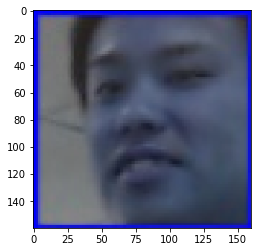

In [76]:
img = cv2.imread("../data/1/unknown_15_37, M.jpg", 1) # 0 gray, 1 rgb
img = imutils.resize(img, width=160)
plt.imshow(img)

In [77]:
gray = cv2.cvtColor(image_fliplr, cv2.COLOR_RGB2GRAY)

In [78]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
rects = detector(gray, 1)

In [79]:
rects

rectangles[[(10, 10) (139, 139)]]

In [80]:
# for (i, rect) in enumerate(rects):
#     shape = predictor(gray, rect)
#     shape = face_utils.shape_to_np(shape)
#     left = shape[36][0] - shape[33][0]
#     right = shape[33][0] - shape[45][0]
#     bias_horizonal = math.fabs(left - right)
    
#     print(bias_horizonal)
#     for (x, y) in shape:
# #         x, y = shape[33]
#         cv2.circle(img, (x, y), 1, (0, 0, 255), -1)

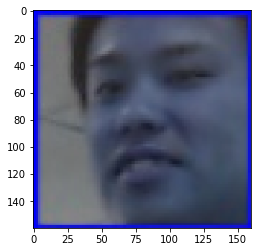

In [81]:
img = imutils.resize(img, width=160)
plt.imshow(img)

In [82]:
fa = FaceAligner(predictor, desiredFaceWidth=160)

In [ ]:
# img = imutils.resize(img, width=160, height=160)
image = fa.align(img, gray, rects[0])
image

In [ ]:
plt.imshow(image)

In [ ]:
# Encoding
face_encoding_5 = face_recognition.face_encodings(image)[0]

In [ ]:
face_encoding_5

In [ ]:
# Load image
image_1 = face_recognition.load_image_file("../data/1/unknown_1.jpg")

# Encoding
face_encoding_1 = face_recognition.face_encodings(image_1)[0]

In [ ]:
# Load image
image_2 = face_recognition.load_image_file("../data/1/unknown_2.jpg")

# Encoding
face_encoding_2 = face_recognition.face_encodings(image_2)[0]


In [ ]:
# Load image
image_3 = face_recognition.load_image_file("../data/1/unknown_5_41, M.jpg")

# Encoding
face_encoding_3 = face_recognition.face_encodings(image_3)[0]

In [211]:
np.linalg.norm(face_encoding_1 - face_encoding_2)

0.41765042281969272

In [215]:
np.linalg.norm(face_encoding_2 - face_encoding_5)

0.2191322403046593

In [53]:
np.linalg.norm(face_encoding_4 - face_encoding_3)

0.37731933024080705

In [112]:
np.linalg.norm(face_encoding_4 - face_encoding_2)

0.46115907745195489

In [20]:
# distance = face_recognition.face_distance(face_encoding_1, face_encoding_2)

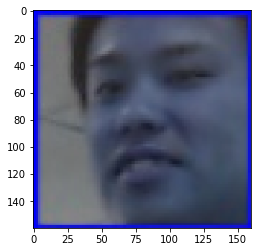

In [16]:
plt.imshow(img)

#### Flip, rotate, rescale

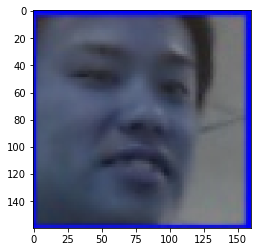

In [83]:
image_fliplr = np.fliplr(img)
plt.imshow(image_fliplr)

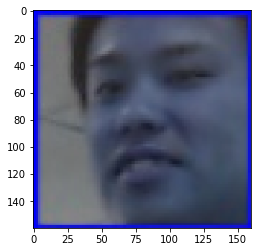

In [84]:
image_flip = np.fliplr(image_fliplr)
plt.imshow(image_flip)

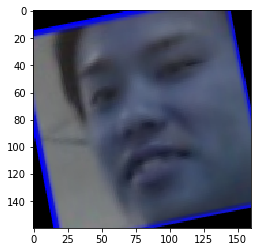

In [19]:
img_rotate = rotate(img, 12)
plt.imshow(img_rotate)

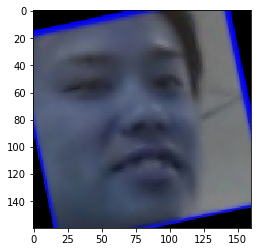

In [20]:
img_rotate1 = rotate(image_fliplr, 12)
plt.imshow(img_rotate1)

In [85]:
face_encoding_1 = face_recognition.face_encodings(img)[0]
face_encoding_2 = face_recognition.face_encodings(image_flip)[0]
face_encoding_3 = face_recognition.face_encodings(image_fliplr)[0]
# face_encoding_4 = face_recognition.face_encodings(img_rotate)[0]
# face_encoding_5 = face_recognition.face_encodings(img_rotate1)[0]

In [86]:
np.linalg.norm(face_encoding_3 - face_encoding_2)

0.21100139043406244

In [87]:
face = []
face.append(face_encoding_2)

In [88]:
face.append(face_encoding_3)

In [46]:
face_recognition.face_distance(face, face_encoding_1)

array([ 0.        ,  0.21100139])

In [47]:
len(face[1])

128

In [48]:
face_encoding_3.shape

(128,)

In [62]:
type(face[0])

numpy.ndarray

In [63]:
face

[array([-0.12111343,  0.11550511,  0.128025  ,  0.02820456, -0.09708177,
         0.01795679,  0.02814277, -0.16608249,  0.16736074, -0.09252542,
         0.2396908 , -0.02523168, -0.22242287, -0.09291077, -0.03407971,
         0.17439729, -0.09404457, -0.18111178,  0.02961583,  0.01236563,
         0.0880473 , -0.03362445,  0.00336234,  0.02169945, -0.09650286,
        -0.37074926, -0.10206847, -0.04403906, -0.06257206, -0.1309807 ,
        -0.04135885,  0.06994286, -0.19525924, -0.03919362, -0.03918266,
         0.1238826 , -0.03140756, -0.05594977,  0.13598567,  0.00847887,
        -0.21578513,  0.00320382, -0.01299199,  0.27035895,  0.21014075,
        -0.00136742,  0.03361846, -0.12385242,  0.06568331, -0.12268489,
         0.04421276,  0.09835701,  0.09384102,  0.04826974, -0.05216102,
        -0.13353327, -0.03088637,  0.07024565, -0.15230747,  0.0214867 ,
         0.0985349 , -0.13444279, -0.03569439, -0.05940828,  0.1739525 ,
         0.12271713, -0.0396402 , -0.19565125,  0.1

In [64]:
face1 = np.load("aaaa.npy")

In [72]:
face1[1][0]

array([ -7.09693804e-02,   1.81701615e-01,   2.98610851e-02,
        -5.78553826e-02,  -7.07048997e-02,  -9.57067311e-03,
        -4.43516299e-02,  -8.34788457e-02,   1.22417293e-01,
        -1.19171090e-01,   2.49410525e-01,  -1.08889401e-01,
        -2.23638996e-01,  -5.35018519e-02,  -5.82104549e-02,
         1.80941030e-01,  -1.78668886e-01,  -1.55965820e-01,
        -5.67234382e-02,   1.85208283e-02,   8.05397257e-02,
        -3.93632278e-02,  -1.88893098e-02,   4.68683168e-02,
        -1.81151927e-02,  -3.49858284e-01,  -8.13121647e-02,
        -1.21781034e-02,   1.89682674e-02,  -6.48313910e-02,
         7.30727054e-03,   3.49403694e-02,  -1.88294828e-01,
        -7.12700486e-02,   1.11826602e-03,   4.03134897e-02,
        -2.93200109e-02,  -2.61236951e-02,   2.04250753e-01,
        -2.04597414e-02,  -2.31231645e-01,   1.04630657e-01,
         1.63828377e-02,   2.85039186e-01,   1.62492618e-01,
         8.57951194e-02,   1.69652887e-02,  -1.38133690e-01,
         6.37972206e-02,

In [52]:
face2 = np.load("bbbb.npy")

In [57]:
type(face1)

numpy.ndarray

In [55]:
face_recognition.face_distance(face, face2)

array([ 0.5848174 ,  0.56813826])